<h1><center>Box Plot</center></h1><br />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import seaborn as sns
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from textwrap import fill
from matplotlib.ticker import FormatStrFormatter
from operator import add
# could also use holoview: http://holoviews.org/

In [26]:
list_csv_file = []
for i in range(60, 90):
    list_csv_file.append("Results_model_run%s.csv" % i)
list_dataframe = []
for filename in list_csv_file:
    list_dataframe.append(pd.read_csv(filename))
merged_dataframes = pd.concat(list_dataframe)
merged_dataframes['End-of-life - total'] = (
    merged_dataframes['End-of-life - repaired'] + merged_dataframes['End-of-life - sold'] 
    + merged_dataframes['End-of-life - recycled'] + 
    merged_dataframes['End-of-life - landfilled'] + merged_dataframes['End-of-life - stored'])
merged_dataframes['Repaired eol PV modules'] = (merged_dataframes['eol - new repaired weight'] + 
                                 merged_dataframes['eol - used repaired weight']) / 1E9
merged_dataframes['Sold eol PV modules'] = (merged_dataframes['eol - new sold weight'] + 
                                 merged_dataframes['eol - used sold weight']) / 1E9
merged_dataframes['Recycled eol PV modules'] = (merged_dataframes['eol - new recycled weight'] + 
                                 merged_dataframes['eol - used recycled weight']) / 1E9
merged_dataframes['Landfilled eol PV modules'] = (merged_dataframes['eol - new landfilled weight'] + 
                                 merged_dataframes['eol - used landfilled weight']) / 1E9
merged_dataframes['Stored eol PV modules'] = (merged_dataframes['eol - new stored weight'] + 
                                 merged_dataframes['eol - used stored weight']) / 1E9
merged_dataframes['% recycled'] = merged_dataframes['Recycled eol PV modules'] / (
    merged_dataframes['Repaired eol PV modules'] + merged_dataframes['Sold eol PV modules'] + 
    merged_dataframes['Recycled eol PV modules'] + merged_dataframes['Landfilled eol PV modules'] + 
    merged_dataframes['Stored eol PV modules'])
merged_dataframes.to_csv("MergedData.csv")
merged_dataframes03 = pd.read_csv("MergedData.csv")
merged_dataframes06 = pd.read_csv("MergedData0.6.csv")
merged_dataframes03['Recycled eol PV modules'] = merged_dataframes03['% recycled'] * 100 * 0.8036
merged_dataframes06['Recycled eol PV modules'] = merged_dataframes06['% recycled'] * 100 * 0.8036
stocks_df03 = merged_dataframes03.filter(['Year', 'Recycled eol PV modules'], axis=1)
stocks_df06 = merged_dataframes06.filter(['Year', 'Recycled eol PV modules'], axis=1)
merged_dataframes03['Recycling costs ($/module)'] = merged_dataframes03['Average recycling cost'] * 235.2
merged_dataframes06['Recycling costs ($/module)'] = merged_dataframes06['Average recycling cost'] * 235.2
eol_cost_df03 = merged_dataframes03.filter(['Recycling costs ($/module)'], axis=1)
eol_cost_df06 = merged_dataframes06.filter(['Recycling costs ($/module)'], axis=1)
Data1 = pd.concat([stocks_df03['Year'], stocks_df03['Recycled eol PV modules'], 
                   stocks_df06['Recycled eol PV modules']], axis=1, 
                     keys=['Year', '18$/module', '10$/module'])
Data2 = pd.concat([stocks_df06['Year'], eol_cost_df03 ['Recycling costs ($/module)'], 
                   eol_cost_df06 ['Recycling costs ($/module)']], axis=1, 
                     keys=['Year', '18$/module', '10$/module', 'eol_cost_df03', 'eol_cost_df06'])
tips2 = Data1.melt('Year', var_name='cols', value_name='vals')
tips2 = tips2.rename(columns={"cols": "Recycling rate:", "vals": 
                              "Mass fraction of deployed modules recycled"})
tips3 = Data2.melt('Year', var_name='cols', value_name='vals')
tips3 = tips3.rename(columns={"cols": "Recycling costs:", "vals": "Recycling costs ($/module)"})

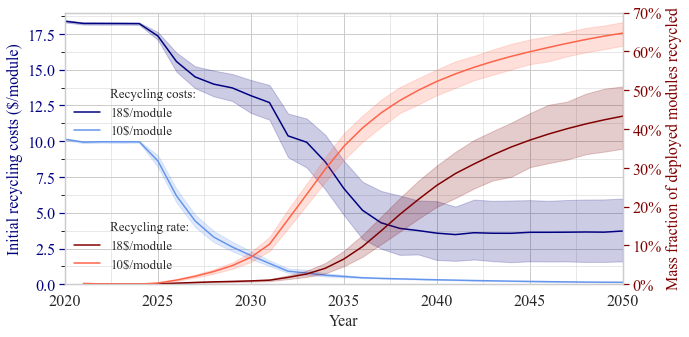

In [27]:
from pylab import rcParams
import matplotlib.ticker as mtick
rcParams['figure.figsize'] = 10, 5
sns.set(style="whitegrid", color_codes=True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=16)
fig, ax = plt.subplots()
result2 = sns.lineplot(x="Year", y="Recycling costs ($/module)", hue="Recycling costs:", 
                       data=tips3, ax=ax, palette=['navy', 'cornflowerblue'])
#result4 = sns.lineplot(x="Year", y="Recycling costs ($/module)", hue=" ", 
 #                      data=tips2, ax=ax, palette=['navy'])
ax.yaxis.label.set_color('navy')
ax.tick_params(axis='y', colors='navy')
ax2 = ax.twinx()
ax2.yaxis.label.set_color('maroon')
ax2.tick_params(axis='y', colors='maroon')
ax2.grid(b=None)
result2.legend(bbox_to_anchor=(0.007, 0.74), loc=2, borderaxespad=0., fontsize=13, frameon=False)
result3 = sns.lineplot(x="Year", y="Mass fraction of deployed modules recycled", hue="Recycling rate:",
                         data=tips2, ax=ax2, palette=['maroon', 'tomato'])
result3.legend(bbox_to_anchor=(0.007, 0.25), loc=2, borderaxespad=0., fontsize=13, frameon=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
#result4 = sns.lineplot(x="Year", y="Costs ($/W-DC)", hue="End of life pathway",
 #                        data=tips4)
#result5 = sns.catplot(x="End of life pathway", y="Costs ($/W-DC)", kind='violin', 
 #                     height=5, aspect=1.4, data=tips5)
# s=7, linewidth=0.5  "GHG emissions (kg $\mathregular{CO_{2}}$ eq / kg plastic)"   Coefficient of variation  Number of study
#     result1.set(xticklabels=[])
#result2.set_xticklabels(rotation=45, ha="right", size=12) # ha="right"
#result2.set_yticklabels(rotation=0, size=12)
#sns.scatterplot(x=[-1.3,-0.3,0.7,1.7], y=[0,4.6,3.6,4.7], color="k", legend=False, marker="x", s=100, linewidth=2)
#plt.setp(result2.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(result2.get_legend().get_title(), fontsize='12')
#     plt.gcf().text(0.08, -0.005, "a)", weight="black", fontsize=8)
import matplotlib as mpl
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(2))
ax.grid(b=True, which='minor', color='lightgrey', linewidth=0.5)
ax.set_xlim(2020, 2050)
ax.set_ylim(0, 19)
ax2.set_ylim(0, 70)
plt.savefig("figure10.2.png", bbox_inches='tight', figsize=(5.5, 3.5), dpi=500)